# Assignment 4 

## For each problem, use the markdown cells and code cells to explain/justify how you obtained your answer. For example, you can use markdown cells to display texts and math equations and use code cells to perform computation. **After you finished this notebook, download the completed notebook (the .ipynb file) and submit it onto Canvas.**

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (25 points)

### The following is a dataframe of parameters of the facility location and transportation problem. Use Pulp to find the optimal facility locations and transportation strategies. Output the optimal solution uisng a dataframe (supply cities as index and demand cities as columns).


In [167]:
url='https://github.com/Menglongmath/MS6721-Supply-Chain-Management/blob/main/MIP%20parameters.xlsx?raw=true'
df_p1=pd.read_excel(url,index_col='Supply City')
df_p1

Atlanta  Boston  Chicago  Denver  Omaha  New York  Portland  \
Supply City                                                                
Baltimore       1675     400      685    1630   1160       920      2800   
Cheyenne        1460    1940      970     100    495       623      1200   
Salt Lake       1925    2400     1425     500    950      1120       800   
Memphis          380    1355      543    1045    665      1456      2321   
Wichita          922    1646      700     508    311       799      1797   
Demand            10       8       14       6      7         9        11   

             Fixed cost  Capacity  
Supply City                        
Baltimore        7650.0      10.0  
Cheyenne         3500.0      30.0  
Salt Lake        5000.0      30.0  
Memphis          4100.0      30.0  
Wichita          2200.0      40.0  
Demand              NaN       NaN

In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pulp
import scipy

In [10]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [165]:
supply_cities = pd.DataFrame(df_p1,columns=["Supply City"])
supply_cities

Supply City
0   Baltimore
1    Cheyenne
2   Salt Lake
3     Memphis
4     Wichita
5      Demand

# Problem 2 (25 points)

### In this problem, you need to follow the instructions to perform linear regression and isotonic regression on a dataset. Read and run each cell. You need to finish the cell after 'Finish the following cell'. 
 
### This dataframe contains two columns: price and demand. Each row of the dataframe is a sample of (price $p$, demand $d$ for price $p$).


 ### The dataframe is stored in github, we first load the data using pandas.read_csv

In [14]:
url='https://raw.githubusercontent.com/Menglongmath/MS6721-Supply-Chain-Management/main/demand_price_lin_reg.csv'
df_p2=pd.read_csv(url,index_col=False)
df_p2.head()

price  demand
0     50     342
1     51     348
2     52     337
3     53     330
4     54     328

### Data exploration: we first explore the dataframe and have a whole picture of the statistics.
### Data exploration is very important when facing a very complicated dataset and can provide you
### some good insights

### One way of data exploration is run df_p2.describe(), which shows basic statistics of each feature
### e.g. mean,std,min,max,...

In [15]:
df_p2.describe()

price      demand
count  50.00000   50.000000
mean   74.50000  276.280000
std    14.57738   43.210467
min    50.00000  202.000000
25%    62.25000  235.750000
50%    74.50000  275.000000
75%    86.75000  318.000000
max    99.00000  348.000000

### Another way is to visualize the dataframe. There are many visualization methods and packages.
 Since we only care about the relationship between prices and demands, we can use scatter plot

Text(0, 0.5, 'demand')

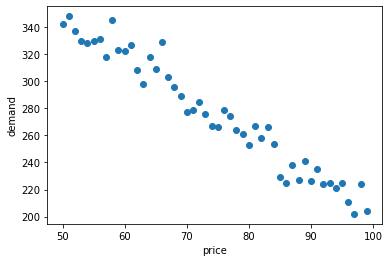

In [16]:
plt.scatter(df_p2.price,df_p2.demand)
plt.xlabel('price')
plt.ylabel('demand')

### By viewing the above figure, we find a linear relationship of demand-price may be appropriate
 We use linear regression to fit the data

In [30]:
# First import the linear regression function from sklearn package
from sklearn.linear_model import LinearRegression
# create a linear regression model
lin_reg = LinearRegression()

# reshape the price feature into a two-dimensional array
price=np.array(df_p2.price).reshape(-1, 1)

# fit the model with the data points
lin_reg.fit(price, df_p2.demand)

LinearRegression()

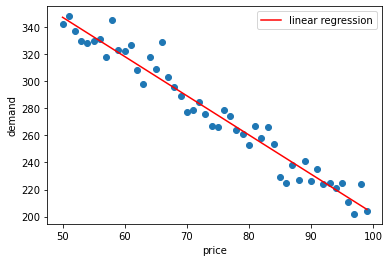

In [31]:
# lin_reg is fitted with the data. Plot the fitted linear function on the price points
# To get the value of the linear function, use lin_reg.predict()

plt.scatter(df_p2.price,df_p2.demand)
plt.plot(df_p2.price, lin_reg.predict(price),color='r',label='linear regression')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend()

# Use isotonic regression to fit the data and plot the function on the price points

In [19]:
from sklearn.isotonic import IsotonicRegression

In [37]:
# create a Isotonic Regression model
iso_reg = IsotonicRegression(out_of_bounds="clip")

# reshape the price feature into a two-dimensional array
price=np.array(df_p2.price).reshape(-1, 1)

# fit the model with the data points
iso_reg.fit(price, df_p2.demand)

IsotonicRegression(out_of_bounds='clip')

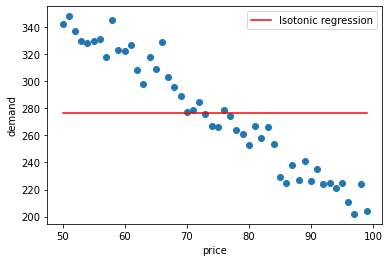

In [28]:
# lin_reg is fitted with the data. Plot the fitted linear function on the price points
# To get the value of the linear function, use iso_reg.predict()

plt.scatter(df_p2.price,df_p2.demand)
plt.plot(df_p2.price, iso_reg.predict(price),color='r',label='Isotonic regression')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend()

# Problem 3 (25 points)

### In this problem, you need to follow the instructions to perform data pre-processing and demand forecasting using random forest on a dataset of soft drink sales in Greece. Read and run each cell. You need to finish the cell after 'Finish the following cell'.


In [41]:

# We first load the dataset

url='https://raw.githubusercontent.com/Menglongmath/MS6721-Supply-Chain-Management/main/soft_drink_sales_processed.csv'
df_p3=pd.read_csv(url,index_col=False)
df_p3

period          city       lat      long       pop    shop  \
0          1        Athens  37.97945  23.71622  672130.0  shop_1   
1          1        Athens  37.97945  23.71622  672130.0  shop_1   
2          1        Athens  37.97945  23.71622  672130.0  shop_1   
3          1        Athens  37.97945  23.71622  672130.0  shop_1   
4          1        Athens  37.97945  23.71622  672130.0  shop_1   
...      ...           ...       ...       ...       ...     ...   
7451      84        Athens  37.97945  23.71622  664046.0  shop_1   
7452      84        Athens  37.97945  23.71622  664046.0  shop_1   
7453      84         Patra  38.24444  21.73444  168034.0  shop_6   
7454      84  Thessaloniki  40.64361  22.93086  354290.0  shop_4   
7455      84     Irakleion  35.32787  25.14341  137154.0  shop_2   

             brand container  capacity(ml)  price  quantity  
0      kinder-cola     glass         500.0   0.96   13280.0  
1      kinder-cola   plastic        1500.0   2.86    6727.0  
2      kinder-cola       can         330.0   0.87    9848.0  
3       adult-cola     glass         500.0   1.00   20050.0  
4       adult-cola       can         330.0   0.39   25696.0  
...            ...       ...           ...    ...       ...  
7451   kinder-cola   plastic        1500.0   2.52   13760.0  
7452  orange-power   plastic        1500.0   2.18   16309.0  
7453   kinder-cola       can         330.0   0.85   24378.0  
7454    adult-cola   plastic        1500.0   2.17   20691.0  
7455    adult-cola     glass         500.0   1.26   24615.0  

[7456 rows x 11 columns]

### This is a dataframe of monthly sales of soft drinks in Greece. This dataset has 7456 rows and 11 columns. That is, there are 7456 samples and 11 features. 
The meaning of each feature is as follows:
 
 |feature| explanation|
 |:-----|:----|
 |period| one period represents one month|
 |city| city of the market|
 |lat| latitude of the city|
 |long|longitude of the city|
 |pop| population of the city|
 |shop| shop id|
 |brand| brand of the drink|
 |container| container of the drink|
 |capacity(ml)| the capacity of the drink in ml|
 |price| unit price of the drink|
 |quantity| monthly sales of the drink|

### Data exploration and preprocessing

In [42]:
df_p3.describe()

period          lat         long            pop  capacity(ml)  \
count  7456.000000  7448.000000  7443.000000    7456.000000   7452.000000   
mean     42.559013    38.300714    23.270184  355042.733637    776.823671   
std      24.285227     1.650816     1.086748  232336.703020    516.237734   
min       1.000000    35.327870    21.734440  134219.000000    330.000000   
25%      21.750000    37.962450    22.417610  141732.000000    330.000000   
50%      43.000000    38.244440    22.930860  257501.500000    500.000000   
75%      64.000000    39.636890    23.716220  665102.000000   1500.000000   
max      84.000000    40.643610    25.143410  672130.000000   1500.000000   

             price       quantity  
count  7456.000000    7456.000000  
mean      1.197193   29408.428380  
std       0.818175   17652.985675  
min       0.110000    2953.000000  
25%       0.620000   16572.750000  
50%       0.930000   25294.500000  
75%       1.510000   37699.000000  
max       4.790000  145287.000000

In [43]:
df_p3.isna().sum()

period           0
city             0
lat              8
long            13
pop              0
shop             0
brand            0
container        3
capacity(ml)     4
price            0
quantity         0
dtype: int64

In [44]:
# use df_p3.dropna(inplace=True) to drop rows with missing values

df_p3.dropna(inplace=True)

In [45]:
df_p3.isna().sum()

period          0
city            0
lat             0
long            0
pop             0
shop            0
brand           0
container       0
capacity(ml)    0
price           0
quantity        0
dtype: int64

In [46]:
# Output the unique values of categorical features and capacity feature
print('city:',df_p3.city.unique())
print('shop:', df_p3.shop.unique())
print('brand:', df_p3.brand.unique())
print('container',df_p3.container.unique())
print('capacity:',df_p3['capacity(ml)'].unique())

city: ['Athens' 'Irakleion' 'Patra' 'Thessaloniki' 'Larisa']
shop: ['shop_1' 'shop_2' 'shop_6' 'shop_4' 'shop_3' 'shop_5']
brand: ['kinder-cola' 'adult-cola' 'orange-power' 'gazoza' 'lemon-boost']
container ['glass' 'plastic' 'can']
capacity: [ 500. 1500.  330.]


### There are many other aspects we can explore, for example, the correlation between different features, the total monthly sales trend, sales trend of different brand,...
### To explore these, it requires some manipulation of the dataset. Now, we only want to get some basic
### ideas about the dataset, we can use some data visulizaiton packages, like pandas_profiling.


In [49]:
pip install pandas_profiling

     |████████████████████████████████| 261 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 662 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 8.9 MB/s eta 0:00:01
  Using cached PyYAML-6.0-cp37-cp37m-macosx_10_9_x86_64.whl (189 kB)
  Using cached pydantic-1.9.0-cp37-cp37m-macosx_10_9_x86_64.whl (2.8 MB)
     |████████████████████████████████| 3.1 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 10.5 MB/s eta 0:00:01     |█▍                              | 184 kB 10.5 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5d4ff1c47997a1d7b95807dd8db331ef11eea67b2102876dcf7995aeee48c5a6
  Stored in directory: /Users/asadtariq/Library/Caches/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: fi

In [50]:
from pandas_profiling import ProfileReport 

In [51]:
ProfileReport(df_p3)

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Since random forecast regressor only takes numerical features as input, to use all the given features, we need to transform the categorical features into binary features. 


In [52]:
# use get_dummies to transform the categorical features into binary features

df_p3_new=pd.get_dummies(df_p3, columns = ['city','shop', 'brand','container']) 
df_p3_new


period       lat      long       pop  capacity(ml)  price  quantity  \
0          1  37.97945  23.71622  672130.0         500.0   0.96   13280.0   
1          1  37.97945  23.71622  672130.0        1500.0   2.86    6727.0   
2          1  37.97945  23.71622  672130.0         330.0   0.87    9848.0   
3          1  37.97945  23.71622  672130.0         500.0   1.00   20050.0   
4          1  37.97945  23.71622  672130.0         330.0   0.39   25696.0   
...      ...       ...       ...       ...           ...    ...       ...   
7451      84  37.97945  23.71622  664046.0        1500.0   2.52   13760.0   
7452      84  37.97945  23.71622  664046.0        1500.0   2.18   16309.0   
7453      84  38.24444  21.73444  168034.0         330.0   0.85   24378.0   
7454      84  40.64361  22.93086  354290.0        1500.0   2.17   20691.0   
7455      84  35.32787  25.14341  137154.0         500.0   1.26   24615.0   

      city_Athens  city_Irakleion  city_Larisa  ...  shop_shop_5  shop_shop_6  \
0               1               0            0  ...            0            0   
1               1               0            0  ...            0            0   
2               1               0            0  ...            0            0   
3               1               0            0  ...            0            0   
4               1               0            0  ...            0            0   
...           ...             ...          ...  ...          ...          ...   
7451            1               0            0  ...            0            0   
7452            1               0            0  ...            0            0   
7453            0               0            0  ...            0            1   
7454            0               0            0  ...            0            0   
7455            0               1            0  ...            0            0   

      brand_adult-cola  brand_gazoza  brand_kinder-cola  brand_lemon-boost  \
0                    0             0                  1                  0   
1                    0             0                  1                  0   
2                    0             0                  1                  0   
3                    1             0                  0                  0   
4                    1             0                  0                  0   
...                ...           ...                ...                ...   
7451                 0             0                  1                  0   
7452                 0             0                  0                  0   
7453                 0             0                  1                  0   
7454                 1             0                  0                  0   
7455                 1             0                  0                  0   

      brand_orange-power  container_can  container_glass  container_plastic  
0                      0              0                1                  0  
1                      0              0                0                  1  
2                      0              1                0                  0  
3                      0              0                1                  0  
4                      0              1                0                  0  
...                  ...            ...              ...                ...  
7451                   0              0                0                  1  
7452                   1              0                0                  1  
7453                   0              1                0                  0  
7454                   0              0                0                  1  
7455                   0              0                1                  0  

[7434 rows x 26 columns]

### Demand forecasting

#### Split the dataset into training set and testing set


In [53]:
# We use the last 12 months data as the testing set

df_train=df_p3_new[df_p3_new.period<= 72]
df_test=df_p3_new[df_p3_new.period>72]


#### Define the input features and demand feature

In [54]:


X=df_train.drop(columns='quantity') # X is the dataset without feature 'quantity'
y=df_train.quantity              # y is the 'quantity' column


In [55]:
# #### Use random forest to fit X,y

# In[41]:


from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()  # define the random forest regressor
rf_reg.fit(X, y)  # fit the random forest model with the training data



RandomForestRegressor()

<BarContainer object of 25 artists>

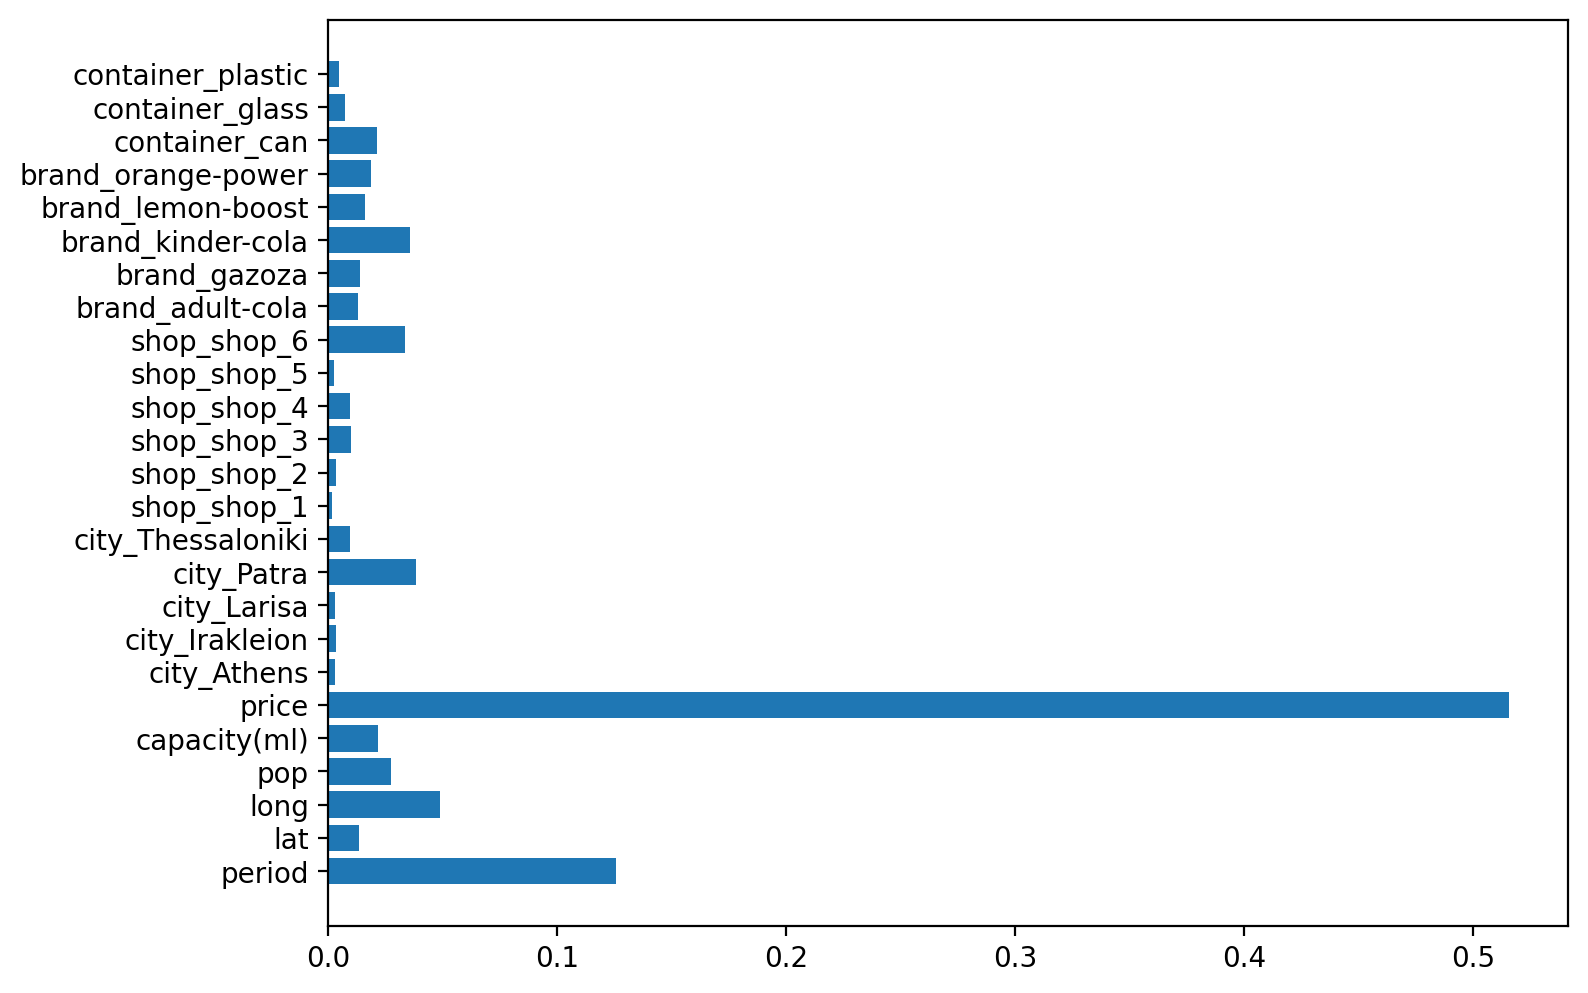

In [56]:
# use the feature_importances_ attribute to plot the importance score of each feature
plt.figure(figsize=(8, 6), dpi=200)
plt.barh(X.columns, rf_reg.feature_importances_)

In [57]:
# From the above figure, we see that price is the most important feature

# #### Demand forecasting for period from 73 to 84


# first define the input features and demand feature
X_test=df_test.drop(columns='quantity')
y_test=df_test.quantity

In [58]:
#use rf_reg.predict to predict the demand
pred=rf_reg.predict(X_test)

#### compute the mean absolute error, mean squared error, mean absolute percentage error of the demand forests over the testing set

In [59]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [62]:
print(' Mean Absoulte error is : ', mean_absolute_error(y_test, pred)) 
print(' Mean Squared error is : ', mean_squared_error(y_test, pred)) 
print(' Mean Absoulte Percentage error is : ', mean_absolute_percentage_error(y_test, pred)) 


 Mean Absoulte error is :  6730.679177693762
 Mean Squared error is :  88866494.91605699
 Mean Absoulte Percentage error is :  0.2510428912649344


## Problem 4 (25 points)

In [96]:

url='https://raw.githubusercontent.com/Menglongmath/MS6721-Supply-Chain-Management/main/TV_sales_df.csv'

df_p4=pd.read_csv(url,index_col=False)
df_p4

month  sales
0   2020-Jan    297
1   2020-Feb    163
2   2020-Mar    168
3   2020-Apr    136
4   2020-May    252
5   2020-Jun     62
6   2020-Jul    305
7   2020-Aug    154
8   2020-Sep    219
9   2020-Oct    185
10  2020-Nov    288
11  2020-Dec     76
12  2021-Jan    181
13  2021-Feb    177
14  2021-Mar    268
15  2021-Apr    134
16  2021-May    190
17  2021-Jun    147
18  2021-Jul    203
19  2021-Aug    235
20  2021-Sep    134
21  2021-Oct    269
22  2021-Nov    254
23  2021-Dec    230

<AxesSubplot:>

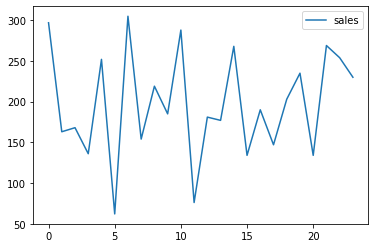

In [65]:
df_p4.plot()

(1)[5pt] Predict the sale of the TV in 2022-Jan using a 12-month moving average method.

/Users/asadtariq/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


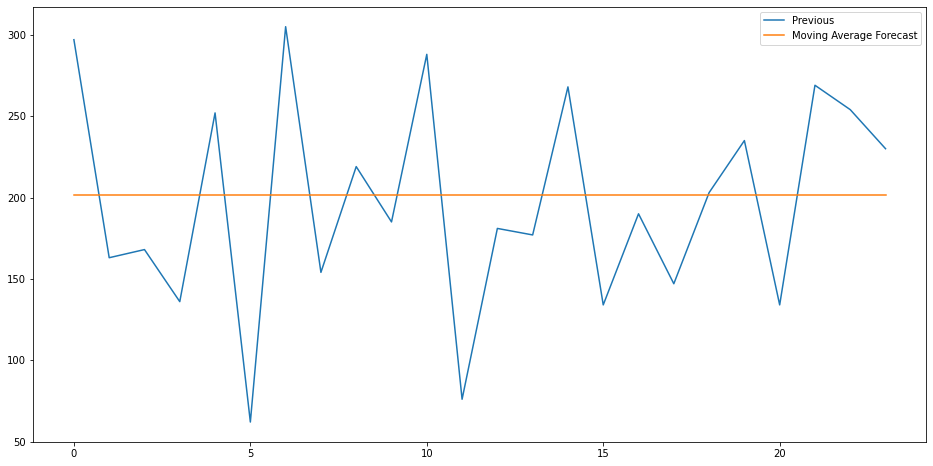

In [84]:
y_hat_avg = df_p4.copy()
y_hat_avg['moving_avg_forecast'] = df_p4['sales'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(df_p4['sales'], label='Previous')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [87]:
df_p4['sales'].rolling(12).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11    192.083333
12    182.416667
13    183.583333
14    191.916667
15    191.750000
16    186.583333
17    193.666667
18    185.166667
19    191.916667
20    184.833333
21    191.833333
22    189.000000
23    201.833333
Name: sales, dtype: float64

### 2. Predict the sale of the TV in 2022-Jan using the simple exponential smoothing method with the smoothing constant $\alpha=0.1$.

Simple Exponential Smoothings

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [113]:
# Simple Exponential Smoothing Method --- with Alpha = 0.10
fit1 = SimpleExpSmoothing(df_p4['sales']).fit(smoothing_level=0.1,optimized=False)

In [114]:
# Fitted Values
fit1.fittedvalues

0     297.000000
1     297.000000
2     283.600000
3     272.040000
4     258.436000
5     257.792400
6     238.213160
7     244.891844
8     235.802660
9     234.122394
10    229.210154
11    235.089139
12    219.180225
13    215.362202
14    211.525982
15    217.173384
16    208.856046
17    206.970441
18    200.973397
19    201.176057
20    204.558452
21    197.502606
22    204.652346
23    209.587111
dtype: float64

In [115]:
fit1.params

{'smoothing_level': 0.1,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 297.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [116]:
# Model Parameters (Formated form)
fit1.params_formatted

name  param  optimized
smoothing_level  alpha    0.1      False
initial_level      l.0  297.0      False

In [121]:
# Predction for next  Month
fcast1 = fit1.forecast(1)
print(' Index and forcast for January 2022 is: ',fcast1)

 Index and forcast for January 2022 is:  24    211.6284
dtype: float64


### (3)[5pt] Suppose that the realized sale in 2022-Jan is 200. Predict the sale of the TV in 2022-Feb using the 12-month moving average method and the simple exponential smoothing method with the smoothing constant $\alpha=0.1$, respectively.

In [130]:
# Adding new row of January 2022
new_row = {'month':'2022-Jan','sales':'200'}
df_p4=df_p4.append(new_row, ignore_index=True)
df_p4

month sales
0   2020-Jan   297
1   2020-Feb   163
2   2020-Mar   168
3   2020-Apr   136
4   2020-May   252
5   2020-Jun    62
6   2020-Jul   305
7   2020-Aug   154
8   2020-Sep   219
9   2020-Oct   185
10  2020-Nov   288
11  2020-Dec    76
12  2021-Jan   181
13  2021-Feb   177
14  2021-Mar   268
15  2021-Apr   134
16  2021-May   190
17  2021-Jun   147
18  2021-Jul   203
19  2021-Aug   235
20  2021-Sep   134
21  2021-Oct   269
22  2021-Nov   254
23  2021-Dec   230
24  2022-Jan   200

/Users/asadtariq/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


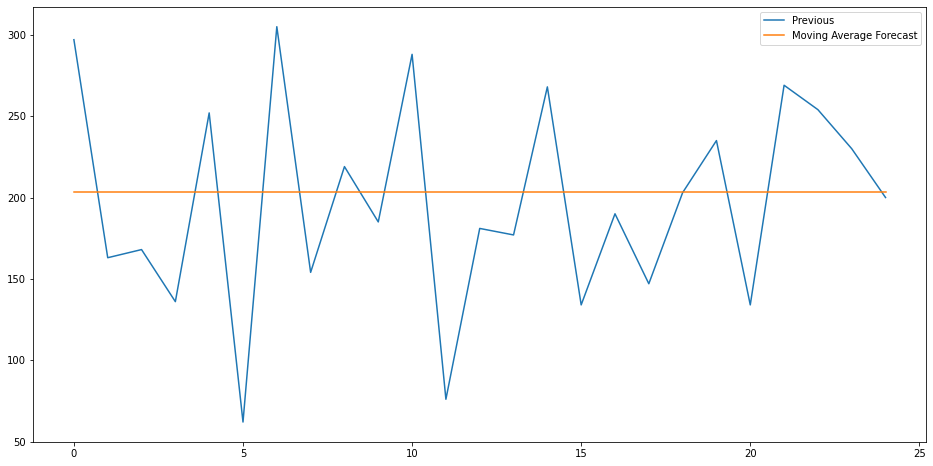

In [131]:
y_hat_avg = df_p4.copy()
y_hat_avg['moving_avg_forecast'] = df_p4['sales'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(df_p4['sales'], label='Previous')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [132]:
df_p4['sales'].rolling(12).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11    192.083333
12    182.416667
13    183.583333
14    191.916667
15    191.750000
16    186.583333
17    193.666667
18    185.166667
19    191.916667
20    184.833333
21    191.833333
22    189.000000
23    201.833333
24    203.416667
Name: sales, dtype: float64

###  Predicting the sale of the TV in 2022-Feb using the simple exponential smoothing method with the smoothing constant $\alpha=0.1$.

Simple Exponential Smoothings

In [135]:
df_p4['sales']

0     297
1     163
2     168
3     136
4     252
5      62
6     305
7     154
8     219
9     185
10    288
11     76
12    181
13    177
14    268
15    134
16    190
17    147
18    203
19    235
20    134
21    269
22    254
23    230
24    200
Name: sales, dtype: object

In [139]:
# Simple Exponential Smoothing Method --- with Alpha = 0.10
fit2 = SimpleExpSmoothing(df_p4['sales'].astype(float)).fit(smoothing_level=0.1,optimized=False)

In [141]:
# Fitted Values
fit2.fittedvalues

0     297.000000
1     297.000000
2     283.600000
3     272.040000
4     258.436000
5     257.792400
6     238.213160
7     244.891844
8     235.802660
9     234.122394
10    229.210154
11    235.089139
12    219.180225
13    215.362202
14    211.525982
15    217.173384
16    208.856046
17    206.970441
18    200.973397
19    201.176057
20    204.558452
21    197.502606
22    204.652346
23    209.587111
24    211.628400
dtype: float64

In [142]:
fit2.params

{'smoothing_level': 0.1,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 297.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [143]:
# Model Parameters (Formated form)
fit2.params_formatted

name  param  optimized
smoothing_level  alpha    0.1      False
initial_level      l.0  297.0      False

In [144]:
# Predction for next  Month
fcast2 = fit2.forecast(1)
print(' Index and forcast for February 2022 is: ',fcast2)

 Index and forcast for February 2022 is:  25    210.46556
dtype: float64


### 4. Suppose that the realized sale in 2022-Feb is 180. Compute the mean absolute error, mean squared error, and mean absolute percentage error for the predictions (2022-Jan and 2022-Feb) using the 12-month moving average method

Predicted values by 12 month average method

In [157]:
predictions = [201.833333,203.416667]
expected =[200,180]


In [158]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 12.625000


In [159]:

mae = mean_squared_error(expected, predictions)
print('MSE: %f' % mae)

MSE: 275.850702


In [160]:

mae = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mae)

MAPE: 0.069630


### (5) Suppose that the realized sale in 2022-Feb is 180. Compute the mean absolute error, mean squared error, and mean absolute percentage error for the predictions (2022-Jan and 2022-Feb) using the simple exponential smoothing method.

Predicted values by 12 month average method

In [152]:
predictions = [211.6284,210.46556] # Predicted values for January and February 2022 
expected =[200,180] # Expected values for January and February 2022


In [153]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 21.046980


In [154]:

mae = mean_squared_error(expected, predictions)
print('MSE: %f' % mae)

MSE: 531.685016


In [156]:

mae = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mae)

MAPE: 0.113698
